In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.nn import Linear, CrossEntropyLoss
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
import torch.utils.data as data
from torchvision import models
import torch.optim as optim
from torch.optim import Adam
import os
import splitfolders

In [2]:
dataset = os.path.join('D:/PytorchProjects/fruitpredication/data/fruit/')
transform = transforms.Compose([
    transforms.ToTensor()
])
dataset = ImageFolder(root=dataset,transform=transform)
print(len(dataset))
dataset.classes

#Calculate The Mean
mean = torch.zeros(3)
for image, _ in dataset:
    mean += image.mean(dim=(1,2))
mean /= len(dataset)

variance_sum = torch.zeros(3)
for image, _ in dataset:
    variance_sum += torch.sum((image - mean.unsqueeze(1).unsqueeze(2))** 2, dim=(1 ,2))
    
std = torch.sqrt(variance_sum / (len(dataset)*224*224))

print(mean)
print(std)    

359
tensor([0.7134, 0.6072, 0.4540])
tensor([2.3817, 2.5602, 2.9844])


In [3]:
#transform the data
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=10),
    
    transforms.Normalize([0.4983, 0.5114, 0.4322], [0.2193, 0.2037, 0.2456])
    
    
])

In [7]:
# input = '/PytorchProjects/fruitpredication/data/fruit/'
# output_path = '/PytorchProjects/fruitpredication/data/'
# ratio = (0.7,0.15,0.15)
# splitfolders.ratio(input, output_path,ratio=ratio, seed=42)

Copying files: 360 files [00:01, 191.19 files/s]


In [8]:
traindata = os.path.join('D:/PytorchProjects/fruitpredication/data/train/')
testdata = os.path.join('D:/PytorchProjects/fruitpredication/data/test/')
valdata = os.path.join('D:/PytorchProjects/fruitpredication/data/val/')

print(len(traindata))
print(len(testdata))
print(len(valdata))

47
46
45


In [9]:
train_data = ImageFolder(traindata,transform=transform)
test_data = ImageFolder(testdata, transform=transform)
val_data =  ImageFolder(valdata, transform=transform)

print("Lenght Of Dataset")
print(len(train_data))
print(len(test_data))
print(len(val_data))
len_train = len(train_data)
len_test = len(test_data)

print("Claases Of Dataset")



print(train_data.classes)
print(test_data.classes)
print(val_data.classes)

Lenght Of Dataset
251
54
54
Claases Of Dataset
['apple fruit', 'banana fruit', 'cherry fruit', 'chickoo fruit', 'grapes fruit', 'kiwi fruit', 'mango fruit', 'orange fruit', 'strawberry fruit']
['apple fruit', 'banana fruit', 'cherry fruit', 'chickoo fruit', 'grapes fruit', 'kiwi fruit', 'mango fruit', 'orange fruit', 'strawberry fruit']
['apple fruit', 'banana fruit', 'cherry fruit', 'chickoo fruit', 'grapes fruit', 'kiwi fruit', 'mango fruit', 'orange fruit', 'strawberry fruit']


In [10]:
#Check Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [11]:
#Index Maping
print(train_data.class_to_idx)

{'apple fruit': 0, 'banana fruit': 1, 'cherry fruit': 2, 'chickoo fruit': 3, 'grapes fruit': 4, 'kiwi fruit': 5, 'mango fruit': 6, 'orange fruit': 7, 'strawberry fruit': 8}


In [12]:
BATCH_SIZE = 64
NUM_EPOCH = 5
train_loader = DataLoader(train_data,batch_size = BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle=True)

print(train_loader)
print(test_loader)

In [13]:
image, label = train_data[0]
image, label
image.size()

torch.Size([3, 224, 224])

In [14]:
#Image Plot
def imshow(img):
    img = image / 2 + 0.5      # unormalize
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


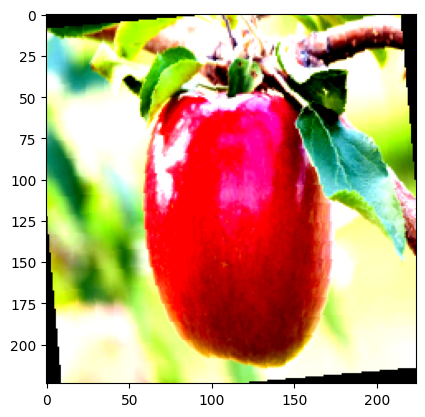

In [15]:
imshow(torchvision.utils.make_grid(image))

In [ ]:
#Create CNN Model